In [5]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




In [6]:
cityname = 'Chicago'

## Get the overall info from the dataset


In [7]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/Chicago-dataset.csv")



In [8]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 3069 non-null   object 
 1   created_at                  3082 non-null   object 
 2   hashtags                    1775 non-null   object 
 3   media                       135 non-null    object 
 4   urls                        3017 non-null   object 
 5   favorite_count              3082 non-null   int64  
 6   id                          3082 non-null   int64  
 7   in_reply_to_screen_name     44 non-null     object 
 8   in_reply_to_status_id       23 non-null     float64
 9   in_reply_to_user_id         44 non-null     float64
 10  lang                        3082 non-null   object 
 11  place                       3069 non-null   object 
 12  possibly_sensitive          3033 non-null   object 
 13  retweet_count               3082 

In [9]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-87.73252393,41.79276377",Sat Mar 21 06:11:10 +0000 2020,NaN,NaN,https://www.swarmapp.com/c/2iTgvbldYID,0,1241245949403504642,NaN,NaN,NaN,...,155,946,7,773-Chi-CaGo,eL 7 $iEttE,FrEsHCkXO,4640,NaN,NaN,False
1,"-88.31785,41.74635",Wed Mar 25 15:16:21 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-KUvMeg4vA-g2ryfZ...,0,1242832701427716103,NaN,NaN,NaN,...,84,550,1,downtown(chicago),tony cruz,0311usmc,2030,NaN,NaN,False
2,"-87.632496,41.883222",Fri Mar 20 17:34:08 +0000 2020,pandemic pandemic2020 corona covid_19 wine mfm...,NaN,https://www.instagram.com/p/B99siCIAIA8/?igshi...,0,1241055435047628800,NaN,NaN,NaN,...,63,368,0,"Chicago, IL",KyndalDolores,KyndalKeener,1600,NaN,https://linktr.ee/Kyndal,False
3,"-87.7903,41.886",Tue Mar 24 14:48:43 +0000 2020,chicago mychicagopix chicagogram insta_chicago...,NaN,https://www.instagram.com/p/B-HsyENAHzU/?igshi...,0,1242463359657639942,NaN,NaN,NaN,...,26,391,6,"Chicago, USA",Ron Sinclair 🌹,flektogram,838,NaN,https://www.tumblr.com/blog/monochromefx,False
4,"-87.6979,41.92357",Thu Mar 26 17:17:14 +0000 2020,NaN,NaN,https://www.instagram.com/p/B-NHXSrFKob/?igshi...,0,1243225510987038725,NaN,NaN,NaN,...,823,580,49,"2321 N Milwaukee Ave, Chicago",Steel Petal Press ®,SteelPetalPress,6620,NaN,http://steelpetalpress.com,False


In [10]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [11]:
df_text.head(10)    

,text,created_at,place,hashtags
0,"Corona Krazy (at @7Eleven in Chicago, IL) http...",Sat Mar 21 06:11:10 +0000 2020,"Chicago, IL",<NA>
1,Corona .... No I never heard of her @ Old Copl...,Wed Mar 25 15:16:21 +0000 2020,"Illinois, USA",<NA>
2,Pandemic Highlight #2 : Time conservation #pa...,Fri Mar 20 17:34:08 +0000 2020,"Chicago, IL",pandemic pandemic2020 corona covid_19 wine mfm...
3,For your self quarantine. • • • • • #chicago ...,Tue Mar 24 14:48:43 +0000 2020,"Oak Park, IL",chicago mychicagopix chicagogram insta_chicago...
4,Who needs to CHILL THE F*CK OUT?! 🙋🏽‍♀️🙋🏽‍♀️🙋🏽...,Thu Mar 26 17:17:14 +0000 2020,"Chicago, IL",<NA>
5,These GOLD AND BLACK JORDAN 6s... GOING CRAZY....,Tue Mar 24 15:17:14 +0000 2020,"Chicago, IL",fresh2death FRESHGODSHIT
6,#socialdistancing the how my daughters boyfrie...,Tue Mar 31 21:45:19 +0000 2020,"Chicago, IL",socialdistancing chicago corona covid19
7,We Still Find Ways To Chill-F Corona(ON Boys I...,Tue Mar 24 15:35:27 +0000 2020,"Chicago, IL",WeStillChilling Abena COVID
8,"#corona #quarantine @ Woodridge, Illinois http...",Sat Mar 21 23:56:44 +0000 2020,"Woodridge, IL",corona quarantine
9,"Oh, the vanity! https://t.co/jhf8zwhQZl",Mon Mar 23 18:42:46 +0000 2020,"Chicago, IL",<NA>


## Cleaning the text Data

In [40]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    
    ## Block these for now
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [41]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [42]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,corona krazi eleven chicago il
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.2,0.1,positive,corona never heard old copley


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [43]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.000000,0.000000,neutral,corona krazi eleven chicago il
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.200000,0.100000,positive,corona never heard old copley
2,pandemic highlight time conservation pandemi...,fri mar 20 17:34:08 +0000 2020,"chicago, il",pandemic pandemic2020 corona covid_19 wine mfm...,0.000000,0.000000,neutral,pandem highlight time conserv pandem pandem co...
3,for your self quarantine chicago mychicagopix ...,tue mar 24 14:48:43 +0000 2020,"oak park, il",chicago mychicagopix chicagogram insta_chicago...,0.000000,0.000000,neutral,self quarantin chicago mychicagopix chicagog...
4,who needs to chill the fck out this constant b...,thu mar 26 17:17:14 +0000 2020,"chicago, il",<na>,0.525000,-0.125000,negative,need chill fck constant barrag bad news ...
5,these gold and black jordan s going crazy so ...,tue mar 24 15:17:14 +0000 2020,"chicago, il",fresh2death freshgodshit,0.611111,-0.155556,negative,gold black jordan go crazi umpman even ...
6,socialdistancing the how my daughters boyfrien...,tue mar 31 21:45:19 +0000 2020,"chicago, il",socialdistancing chicago corona covid19,0.000000,0.000000,neutral,socialdistanc daughter boyfriend came visi...
7,we still find ways to chillf coronaon boys in ...,tue mar 24 15:35:27 +0000 2020,"chicago, il",westillchilling abena covid,0.000000,0.000000,neutral,still find way chillf coronaon boy di build...
8,corona quarantine woodridge illinois,sat mar 21 23:56:44 +0000 2020,"woodridge, il",corona quarantine,0.000000,0.000000,neutral,corona quarantin woodridg illinoi
9,oh the vanity,mon mar 23 18:42:46 +0000 2020,"chicago, il",<na>,0.000000,0.000000,neutral,oh vaniti


In [44]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_chicago.csv")

## Make a WordCloud chart -word frequency map

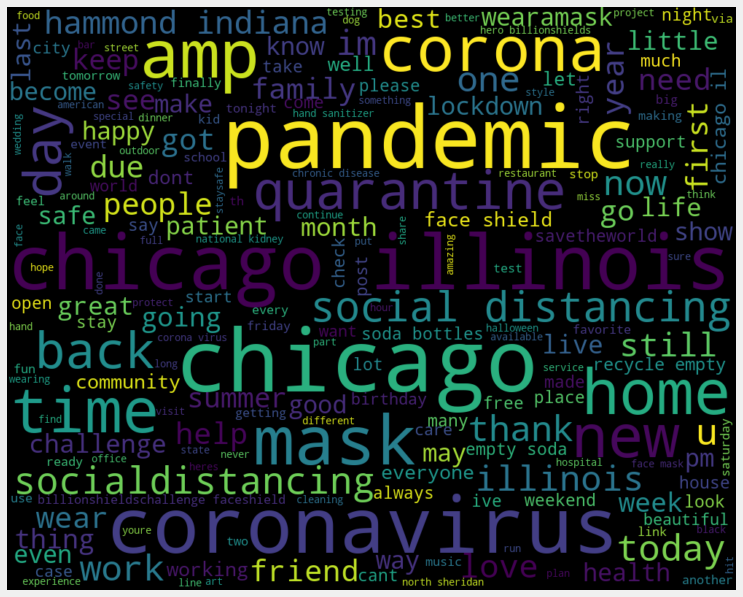

In [45]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [18]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [19]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [20]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

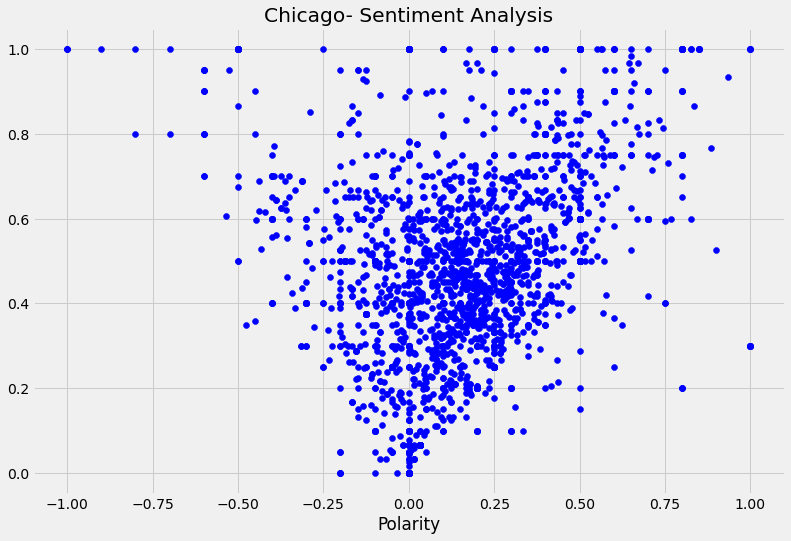

In [21]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title(cityname +'- Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [22]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 53.0 %


In [23]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 16.9 %


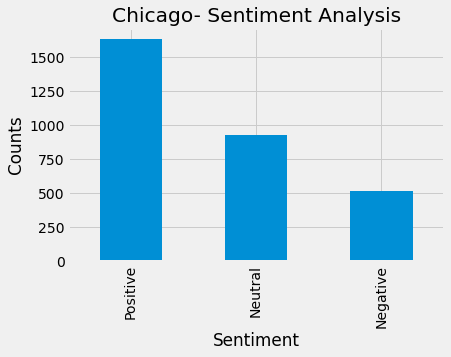

In [24]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title(cityname +'- Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [25]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [26]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [27]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,Corona Krazy at Eleven in Chicago IL,Sat Mar 21 06:11:10 +0000 2020,"Chicago, IL",<NA>,0.0,0.0,Neutral,"[Corona, Krazy, at, Eleven, in, Chicago, IL]"


In [28]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,"['corona', 'krazy', 'at', 'eleven', 'in', 'chi..."


## B.2 Apply Filters - Find/Remove Stopwords

In [29]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [30]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [31]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [32]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,"[corona, krazy, , eleven, , chicago, il]"
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.2,0.1,positive,"[corona, , , never, heard, , , old, copley]"


## B.2 Apply Filters - stemming words

In [33]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [34]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [35]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,"[corona, krazi, , eleven, , chicago, il]"
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.2,0.1,positive,"[corona, , , never, heard, , , old, copley]"


## Return the cleaned data into a sentence format

In [36]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,corona krazi eleven chicago il
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.2,0.1,positive,corona never heard old copley
2,pandemic highlight time conservation pandemi...,fri mar 20 17:34:08 +0000 2020,"chicago, il",pandemic pandemic2020 corona covid_19 wine mfm...,0.0,0.0,neutral,pandem highlight time conserv pandem pandem co...
3,for your self quarantine chicago mychicagopix ...,tue mar 24 14:48:43 +0000 2020,"oak park, il",chicago mychicagopix chicagogram insta_chicago...,0.0,0.0,neutral,self quarantin chicago mychicagopix chicagog...
4,who needs to chill the fck out this constant b...,thu mar 26 17:17:14 +0000 2020,"chicago, il",<na>,0.525,-0.12499999999999994,negative,need chill fck constant barrag bad news ...
5,these gold and black jordan s going crazy so ...,tue mar 24 15:17:14 +0000 2020,"chicago, il",fresh2death freshgodshit,0.6111111111111112,-0.15555555555555553,negative,gold black jordan go crazi umpman even ...
6,socialdistancing the how my daughters boyfrien...,tue mar 31 21:45:19 +0000 2020,"chicago, il",socialdistancing chicago corona covid19,0.0,0.0,neutral,socialdistanc daughter boyfriend came visi...
7,we still find ways to chillf coronaon boys in ...,tue mar 24 15:35:27 +0000 2020,"chicago, il",westillchilling abena covid,0.0,0.0,neutral,still find way chillf coronaon boy di build...
8,corona quarantine woodridge illinois,sat mar 21 23:56:44 +0000 2020,"woodridge, il",corona quarantine,0.0,0.0,neutral,corona quarantin woodridg illinoi
9,oh the vanity,mon mar 23 18:42:46 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,oh vaniti


## Create a WordCloud from cleaned tweets


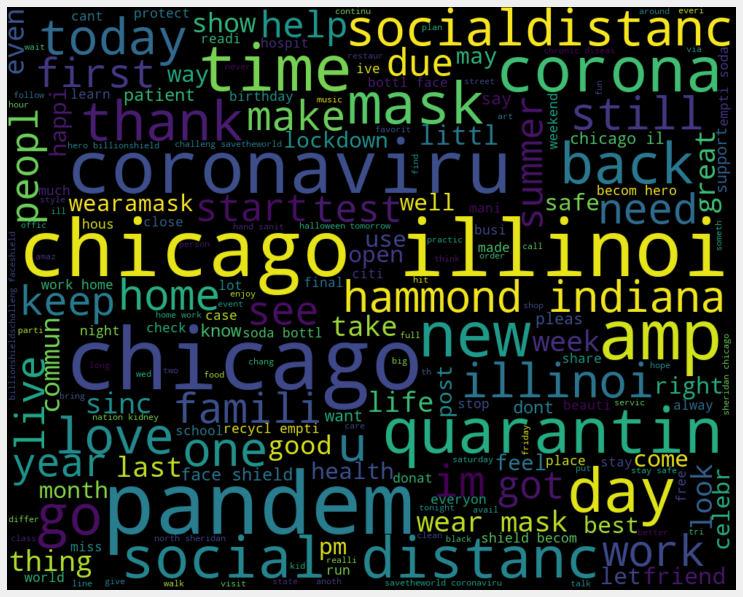

In [46]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])


wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
# size the plt object

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [47]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000294CC5ABF10>>

In [39]:
from datetime import datetime
from dateutil.parser import parse


In [51]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [52]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,"chicago, il",<na>,0.0,0.0,neutral,corona krazi eleven chicago il,2020-03-21 06:11:10,3
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,"illinois, usa",<na>,0.2,0.1,positive,corona never heard old copley,2020-03-25 15:16:21,3
2,pandemic highlight time conservation pandemi...,fri mar 20 17:34:08 +0000 2020,"chicago, il",pandemic pandemic2020 corona covid_19 wine mfm...,0.0,0.0,neutral,pandem highlight time conserv pandem pandem co...,2020-03-20 17:34:08,3


## Data preparation for further visualizations

In [53]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [54]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,-0.006565
1,addison,0.215741
2,algonquin,-0.079167
3,alsip,0.197531
4,arlington heights,0.069769


<AxesSubplot:ylabel='place'>

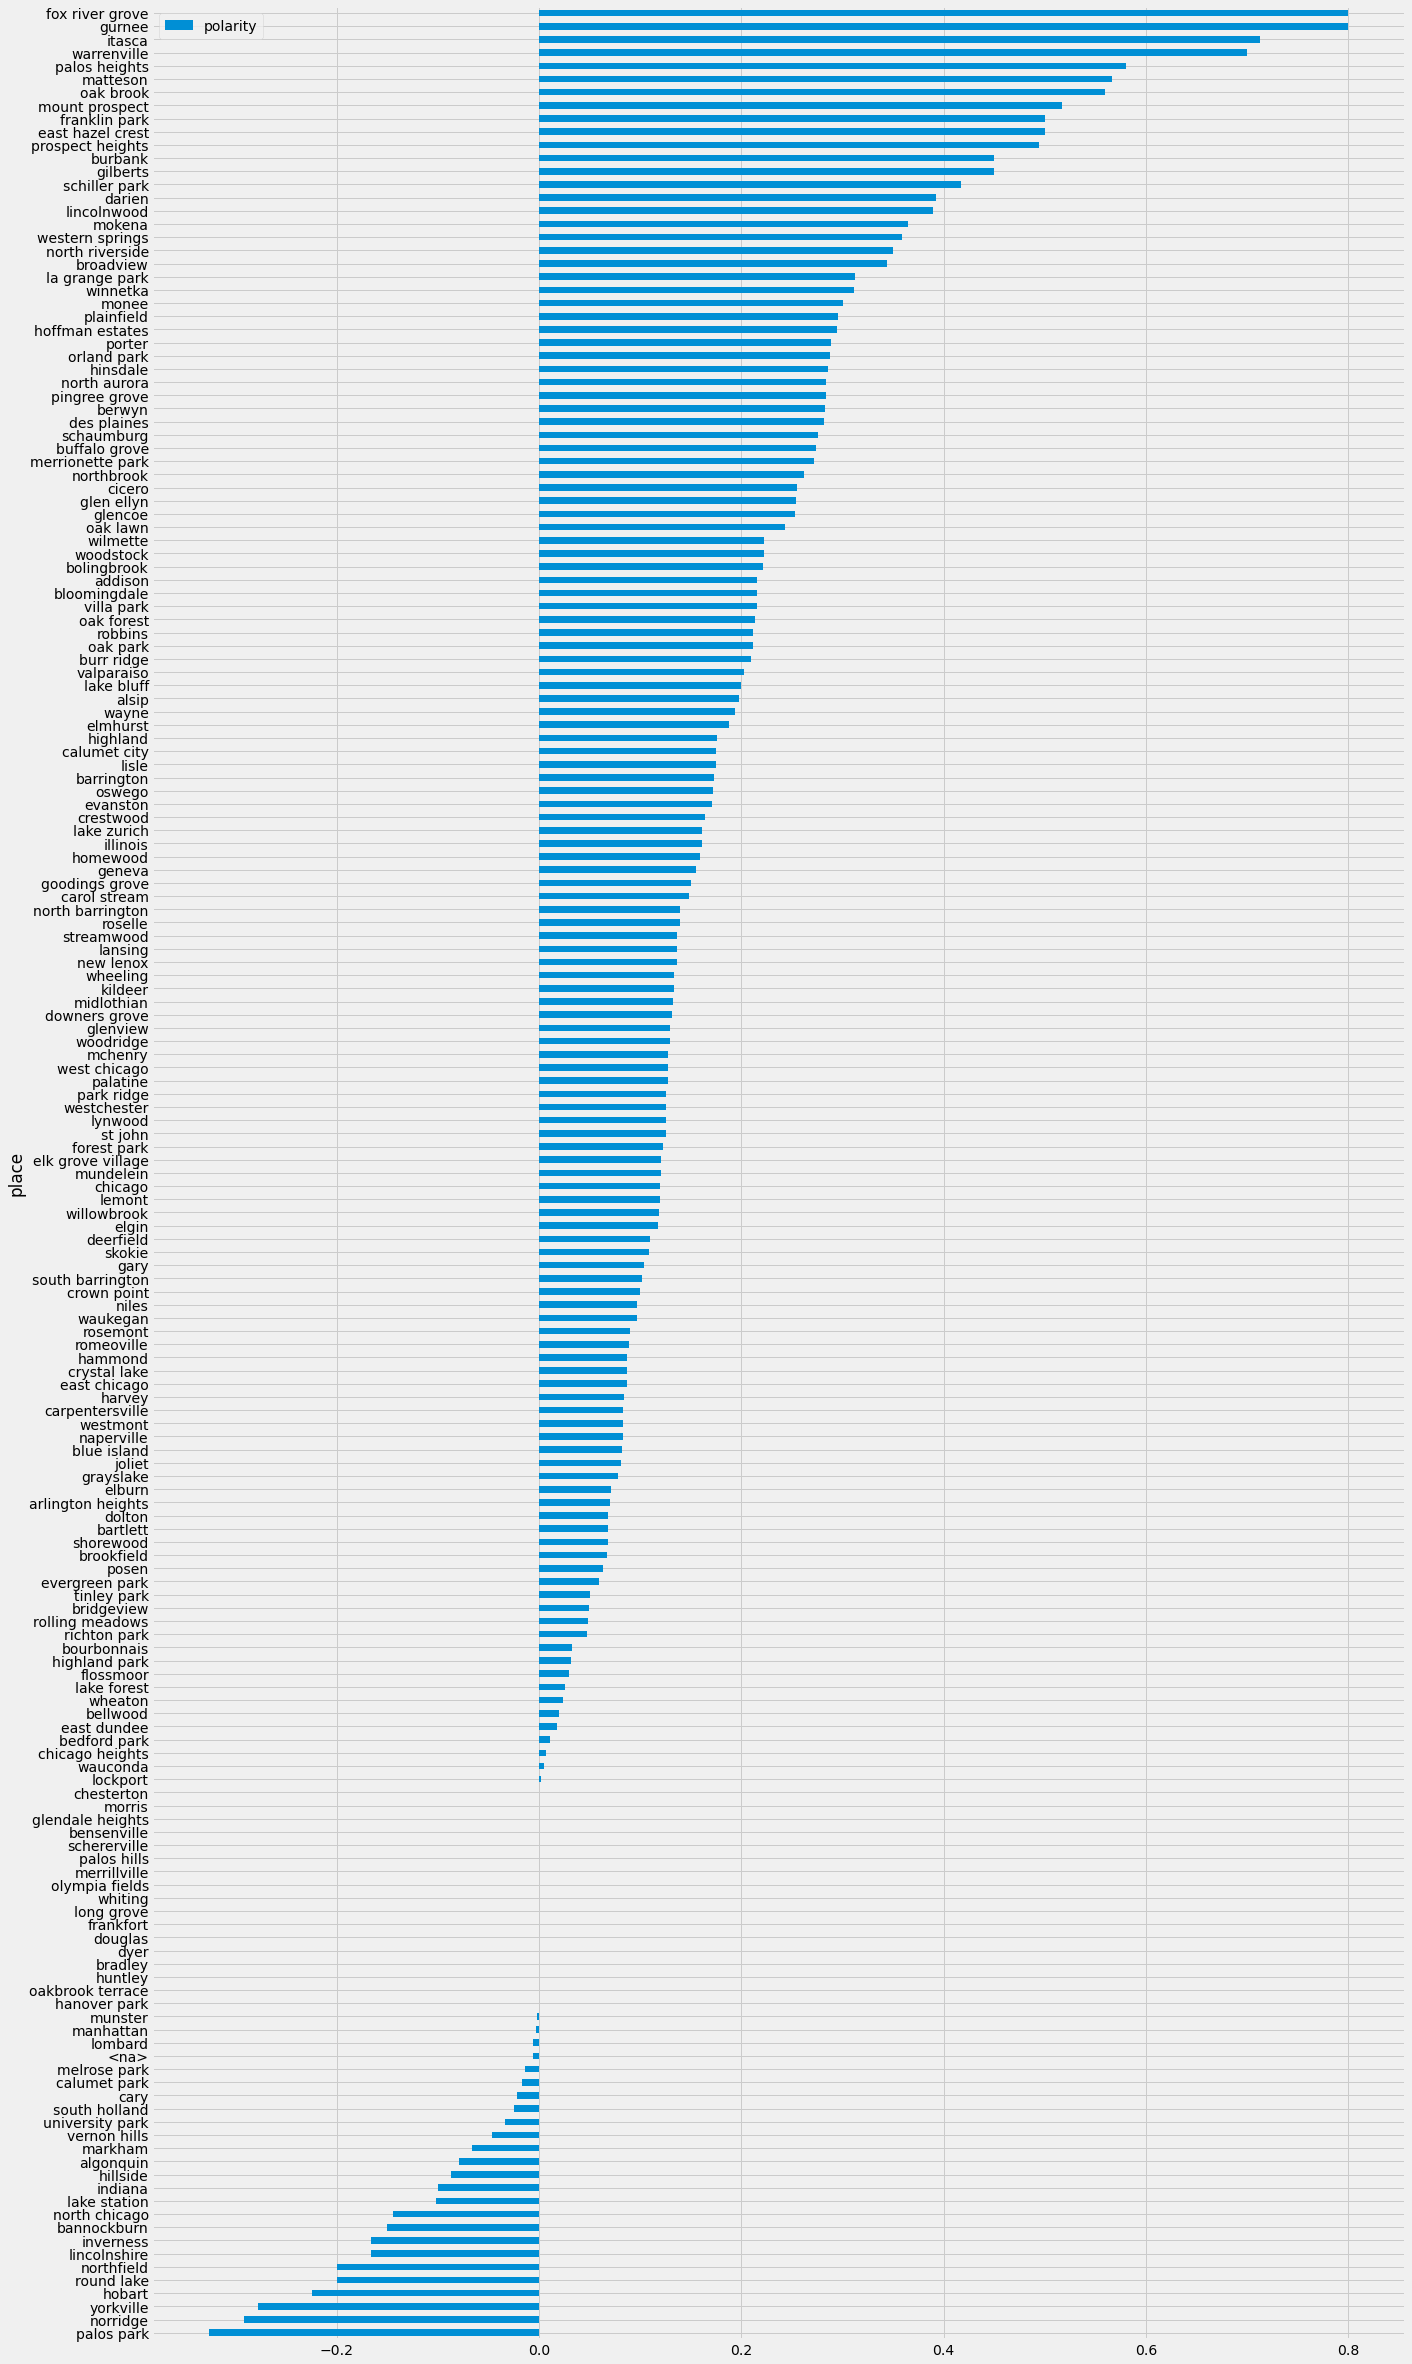

In [57]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(20, 40))





In [56]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.096624
1,4,0.138791
2,5,0.127332
3,6,0.115525
4,7,0.126678


<AxesSubplot:xlabel='month'>

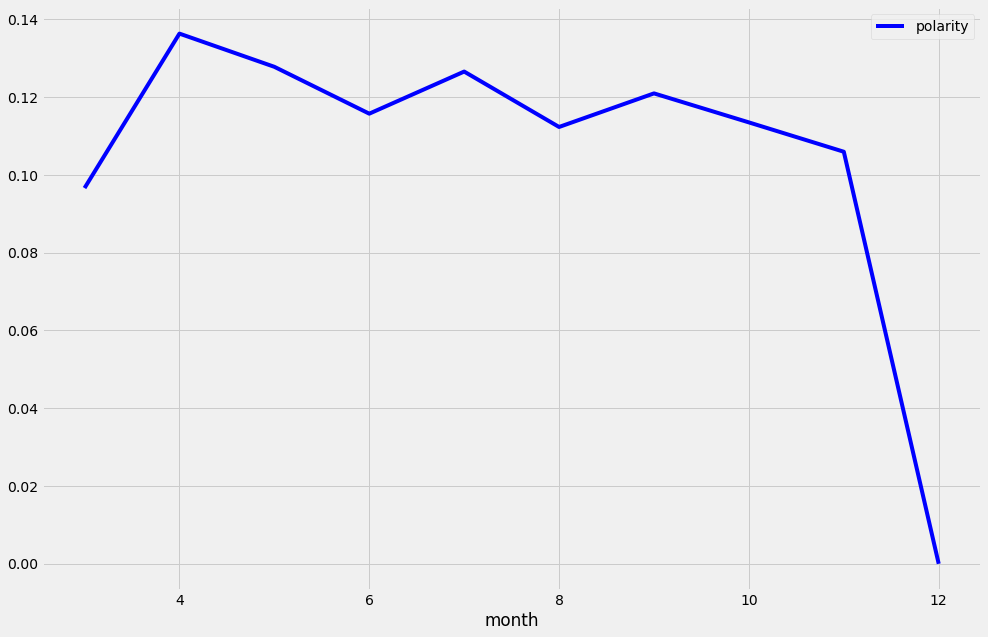

In [43]:
# Chart sentiments based on regions
# overall sentiment on monthly

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue")


## Extract Hashtags

In [44]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,chicago,<na>,0.000000,0.000000,neutral,corona krazi eleven chicago il,2020-03-21 06:11:10,3
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,illinois,<na>,0.200000,0.100000,positive,corona never heard old copley,2020-03-25 15:16:21,3
2,pandemic highlight time conservation pandemi...,fri mar 20 17:34:08 +0000 2020,chicago,pandemic pandemic2020 corona covid_19 wine mfm...,0.000000,0.000000,neutral,pandem highlight time conserv pandem pandem co...,2020-03-20 17:34:08,3
3,for your self quarantine chicago mychicagopix ...,tue mar 24 14:48:43 +0000 2020,oak park,chicago mychicagopix chicagogram insta_chicago...,0.000000,0.000000,neutral,self quarantin chicago mychicagopix chicagog...,2020-03-24 14:48:43,3
4,who needs to chill the fck out this constant b...,thu mar 26 17:17:14 +0000 2020,chicago,<na>,0.525000,-0.125000,negative,need chill fck constant barrag bad news ...,2020-03-26 17:17:14,3
5,these gold and black jordan s going crazy so ...,tue mar 24 15:17:14 +0000 2020,chicago,fresh2death freshgodshit,0.611111,-0.155556,negative,gold black jordan go crazi umpman even ...,2020-03-24 15:17:14,3
6,socialdistancing the how my daughters boyfrien...,tue mar 31 21:45:19 +0000 2020,chicago,socialdistancing chicago corona covid19,0.000000,0.000000,neutral,socialdistanc daughter boyfriend came visi...,2020-03-31 21:45:19,3
7,we still find ways to chillf coronaon boys in ...,tue mar 24 15:35:27 +0000 2020,chicago,westillchilling abena covid,0.000000,0.000000,neutral,still find way chillf coronaon boy di build...,2020-03-24 15:35:27,3
8,corona quarantine woodridge illinois,sat mar 21 23:56:44 +0000 2020,woodridge,corona quarantine,0.000000,0.000000,neutral,corona quarantin woodridg illinoi,2020-03-21 23:56:44,3
9,oh the vanity,mon mar 23 18:42:46 +0000 2020,chicago,<na>,0.000000,0.000000,neutral,oh vaniti,2020-03-23 18:42:46,3


In [45]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [46]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [47]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
9,coronavirus,73
35,covid19,69
179,savetheworld,46
181,faceshield,40
180,billionshieldschallenge,38
65,covid,33
183,billionshields,29
34,chicago,25
5,quarantine,20
8,corona,18


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

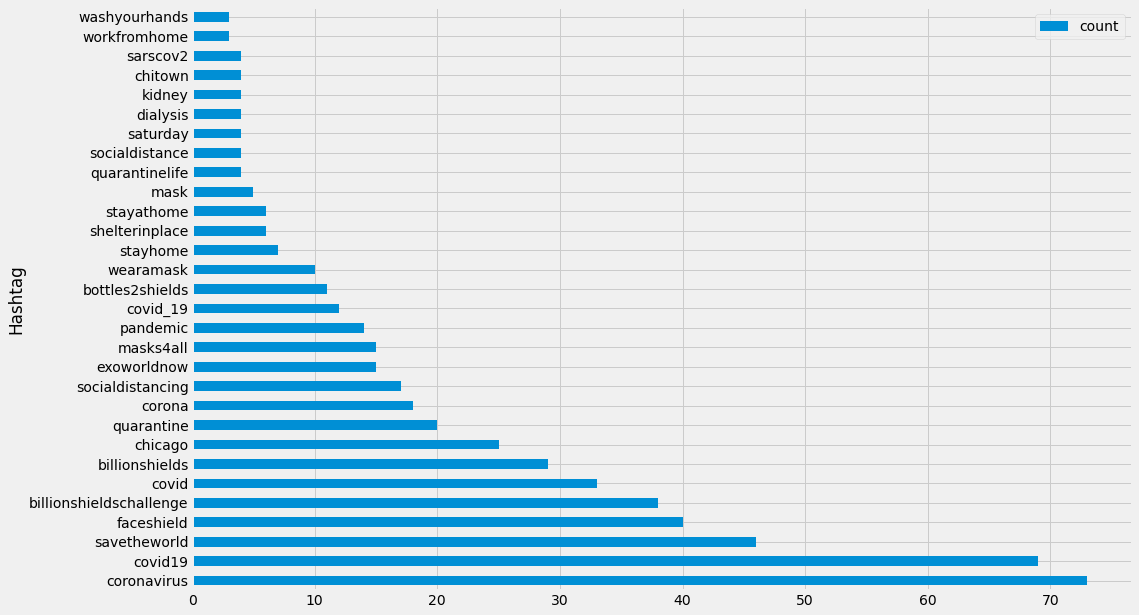

In [48]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))


In [49]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
176,covid19,226
36,chicago,106
41,coronavirus,81
13,socialdistancing,70
2,corona,63
175,covid,61
16,quarantine,51
424,pandemic,36
860,wearamask,32
14,covid_19,28


<AxesSubplot:ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

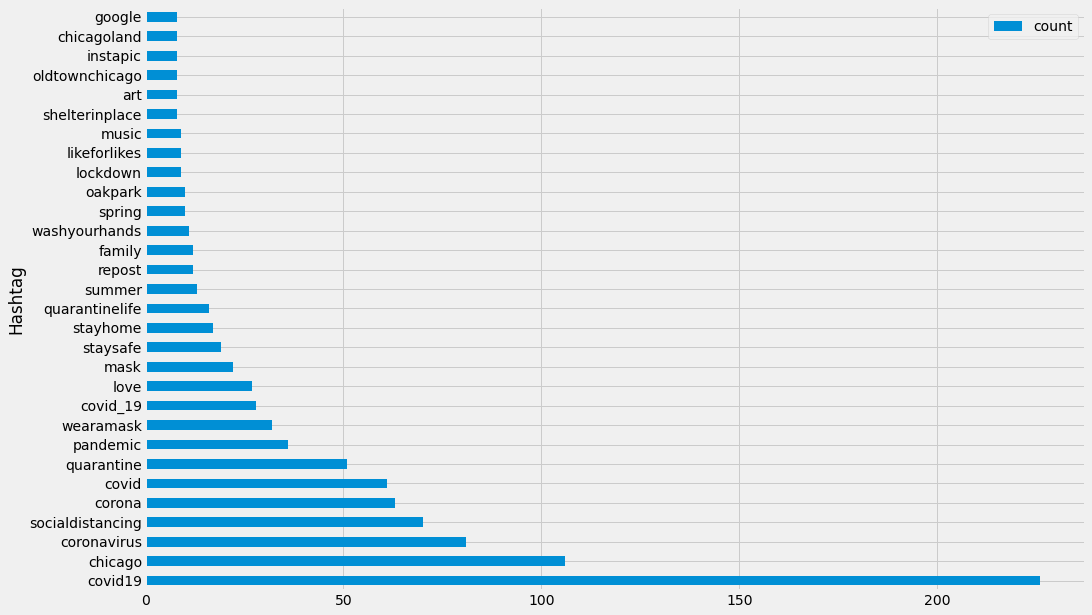

In [50]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10))

In [51]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [52]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [53]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,corona krazy at eleven in chicago il,sat mar 21 06:11:10 +0000 2020,chicago,<na>,0.000,0.000,neutral,corona krazi eleven chicago il,2020-03-21 06:11:10,3,0
1,corona no i never heard of her old copley,wed mar 25 15:16:21 +0000 2020,illinois,<na>,0.200,0.100,positive,corona never heard old copley,2020-03-25 15:16:21,3,0
2,pandemic highlight time conservation pandemi...,fri mar 20 17:34:08 +0000 2020,chicago,pandemic pandemic2020 corona covid_19 wine mfm...,0.000,0.000,neutral,pandem highlight time conserv pandem pandem co...,2020-03-20 17:34:08,3,0
3,for your self quarantine chicago mychicagopix ...,tue mar 24 14:48:43 +0000 2020,oak park,chicago mychicagopix chicagogram insta_chicago...,0.000,0.000,neutral,self quarantin chicago mychicagopix chicagog...,2020-03-24 14:48:43,3,0
4,who needs to chill the fck out this constant b...,thu mar 26 17:17:14 +0000 2020,chicago,<na>,0.525,-0.125,negative,need chill fck constant barrag bad news ...,2020-03-26 17:17:14,3,0
